# Laboratory work #1
For beginning importing libraries.

In [29]:
# Importing scikit-learn libraries
from sklearn import preprocessing
from  sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Importing other libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import zipfile

#### Downloading Dataset
Our dataset is Possible Asteroid Impacts with Earth (from [kaggle](https://www.kaggle.com/datasets/nasa/asteroid-impacts))

## Preprocessing Dataset

In [2]:
# Loading dataset to pandas DataFrame
asteroid_impacts_df = pd.read_csv("datasets\\asteroid_dataset\\impacts.csv")

In [4]:
# Getting data from dataframe
print(asteroid_impacts_df.head())
# Getting names of column
print("==>Column names<==")
print(f"=>impact names: {asteroid_impacts_df.columns.tolist()}")
# Getting size of dataset
print("==>Dataset size<==")
print(f"impact shape={asteroid_impacts_df.shape}")

  Object Name  Period Start  Period End  Possible Impacts  \
0    2006 WP1          2017        2017                 1   
1     2013 YB          2017        2046                23   
2     2008 US          2017        2062                30   
3  2010 VR139          2017        2076                24   
4  2015 ME131          2017        2096                85   

   Cumulative Impact Probability  Asteroid Velocity  Asteroid Magnitude  \
0                   5.200000e-09              17.77                28.3   
1                   7.600000e-05               8.98                31.4   
2                   1.600000e-05              18.33                31.4   
3                   2.000000e-07               4.99                26.7   
4                   2.300000e-08              19.46                19.2   

   Asteroid Diameter (km)  Cumulative Palermo Scale  Maximum Palermo Scale  \
0                   0.007                     -8.31                  -8.31   
1                   0.002 

In [5]:
# Getting info from dataframe
print(asteroid_impacts_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Object Name                    683 non-null    object 
 1   Period Start                   683 non-null    int64  
 2   Period End                     683 non-null    int64  
 3   Possible Impacts               683 non-null    int64  
 4   Cumulative Impact Probability  683 non-null    float64
 5   Asteroid Velocity              683 non-null    float64
 6   Asteroid Magnitude             683 non-null    float64
 7   Asteroid Diameter (km)         683 non-null    float64
 8   Cumulative Palermo Scale       683 non-null    float64
 9   Maximum Palermo Scale          683 non-null    float64
 10  Maximum Torino Scale           683 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 58.8+ KB
None


In [3]:
# Drop unnecessary columns for analysis from the dataframe
asteroid_impacts_df.drop(["Object Name", "Period Start", "Period End",
                          "Cumulative Palermo Scale"], axis=1, inplace=True)
print(asteroid_impacts_df.columns)

Index(['Possible Impacts', 'Cumulative Impact Probability',
       'Asteroid Velocity', 'Asteroid Magnitude', 'Asteroid Diameter (km)',
       'Maximum Palermo Scale', 'Maximum Torino Scale'],
      dtype='object')


In [4]:
# Get the value count of Maximum Torino Scale
print(asteroid_impacts_df.iloc[:, -1].value_counts())

0      680
(*)      3
Name: Maximum Torino Scale, dtype: int64


In [5]:
# Drop Maximum Torino Scale as it's all values are 0
asteroid_impacts_df.drop(["Maximum Torino Scale"], axis=1, inplace=True)
print(asteroid_impacts_df.columns)

Index(['Possible Impacts', 'Cumulative Impact Probability',
       'Asteroid Velocity', 'Asteroid Magnitude', 'Asteroid Diameter (km)',
       'Maximum Palermo Scale'],
      dtype='object')


In [9]:
# Get the description of the dataframe
print(asteroid_impacts_df.describe())

       Period Start   Period End  Possible Impacts  \
count    683.000000   683.000000        683.000000   
mean    2062.573939  2099.680820         43.348463   
std       43.501694    37.594698        113.773280   
min     2017.000000  2017.000000          1.000000   
25%     2034.000000  2090.000000          2.000000   
50%     2061.000000  2109.000000          6.000000   
75%     2085.000000  2114.000000         29.000000   
max     2880.000000  2880.000000       1144.000000   

       Cumulative Impact Probability  Asteroid Velocity  Asteroid Magnitude  \
count                   6.830000e+02         683.000000          683.000000   
mean                    1.539476e-04          11.462577           26.158272   
std                     2.519607e-03           6.067772            2.388296   
min                     1.100000e-10           0.340000           15.600000   
25%                     1.100000e-07           7.240000           25.000000   
50%                     1.700000e-06   

## Creating functions for visualise data

In [6]:
def boxplot_data(dataframe, features, target_features):
    """Function to show boxplot of dataframe;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features from dataframe.
    """
    # Define plot variables
    n = len(features)
    cols = 3
    rows = int(n/cols)
    features_iter = 0

    # Build plot
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 25))
    for i in range(rows):
        for j in range(cols):
            if features_iter == target_features:
                features_iter += 1
                continue
            sns.boxplot(x=features[target_features], y=features[features_iter], data=dataframe, ax=ax[i][j])
            features_iter += 1

    plt.show()

def remove_outliers(dataframe, features):
    """Function to remove the outliers;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features from dataframe.
    """
    # Copy dataframe to another variable
    dataframe_copy = dataframe.copy()

    # Iterate through features
    for feature in features:

        # Calculate q1, q3 and iqr
        q3 = dataframe[feature].quantile(0.75)
        q1 = dataframe[feature].quantile(0.25)
        iqr = q3 - q1

        # Get local minimum and maximum
        local_min = q1 - (1.5 * iqr)
        local_max = q3 + (1.5 * iqr)

        # Remove the outliers
        dataframe_copy = dataframe_copy[(dataframe_copy[feature] >= local_min) &
                                        (dataframe_copy[feature] <= local_max)]

    return dataframe_copy

def histogram_data(dataframe, features):
    """Function to show histogram of dataframe;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features from dataframe.
    """
    # Define plot variables
    n = len(features)
    cols = 3
    rows = int(n/cols)
    features_iter = 1

    # Build plot
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 25))
    for i in range(rows):
        for j in range(cols):
            if len(features) <= features_iter:
                break
            sns.histplot(x=features[features_iter-1], y=features[features_iter], data=dataframe, ax=ax[i][j])
            features_iter += 1
    plt.show()


## Visualising Dataset

C:\Users\Who\AppData\Local\Temp\ipykernel_6812\2912877162.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


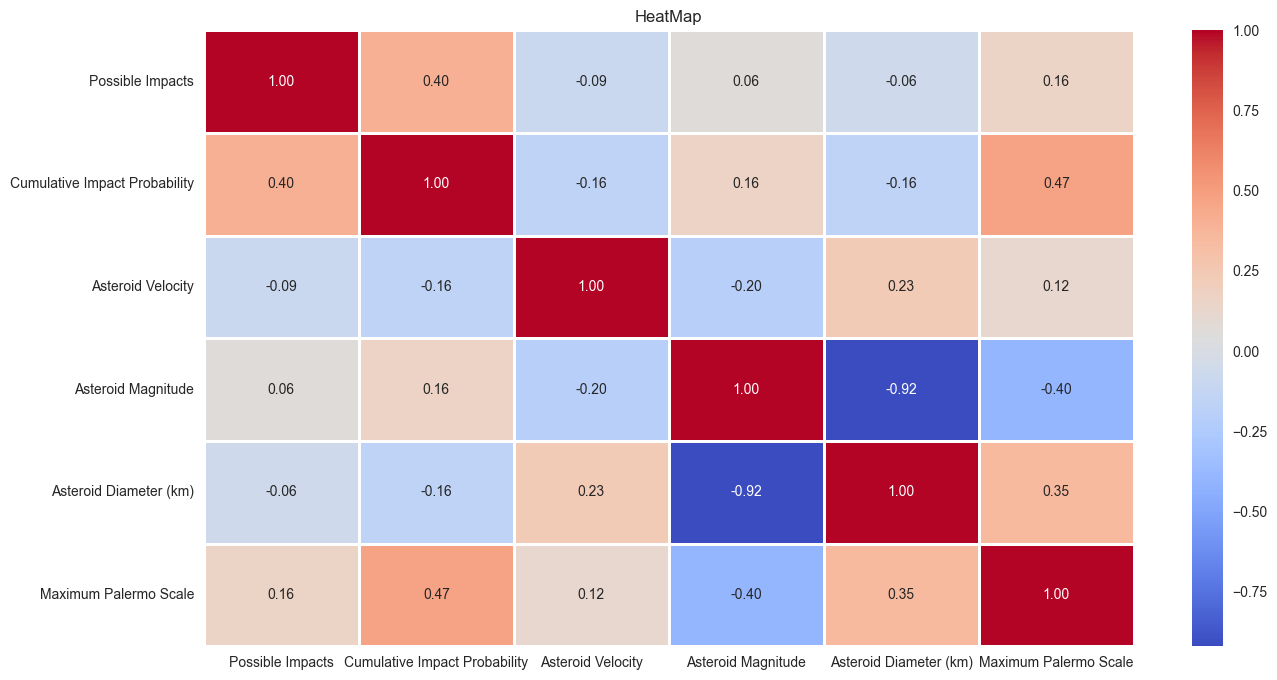

In [13]:
# Visualising with heatmap
plt.style.use("seaborn")
plt.figure(figsize=(15, 8))
heat_map = sns.heatmap(asteroid_impacts_df.corr(), cmap="coolwarm", linewidths=1, annot=True, fmt=".2f")
plt.title("HeatMap")
plt.show()

In [14]:
# Extract features from the df
asteroid_impacts_features = asteroid_impacts_df.columns.tolist()
print(asteroid_impacts_features)

['Possible Impacts', 'Cumulative Impact Probability', 'Asteroid Velocity', 'Asteroid Magnitude', 'Asteroid Diameter (km)', 'Maximum Palermo Scale']


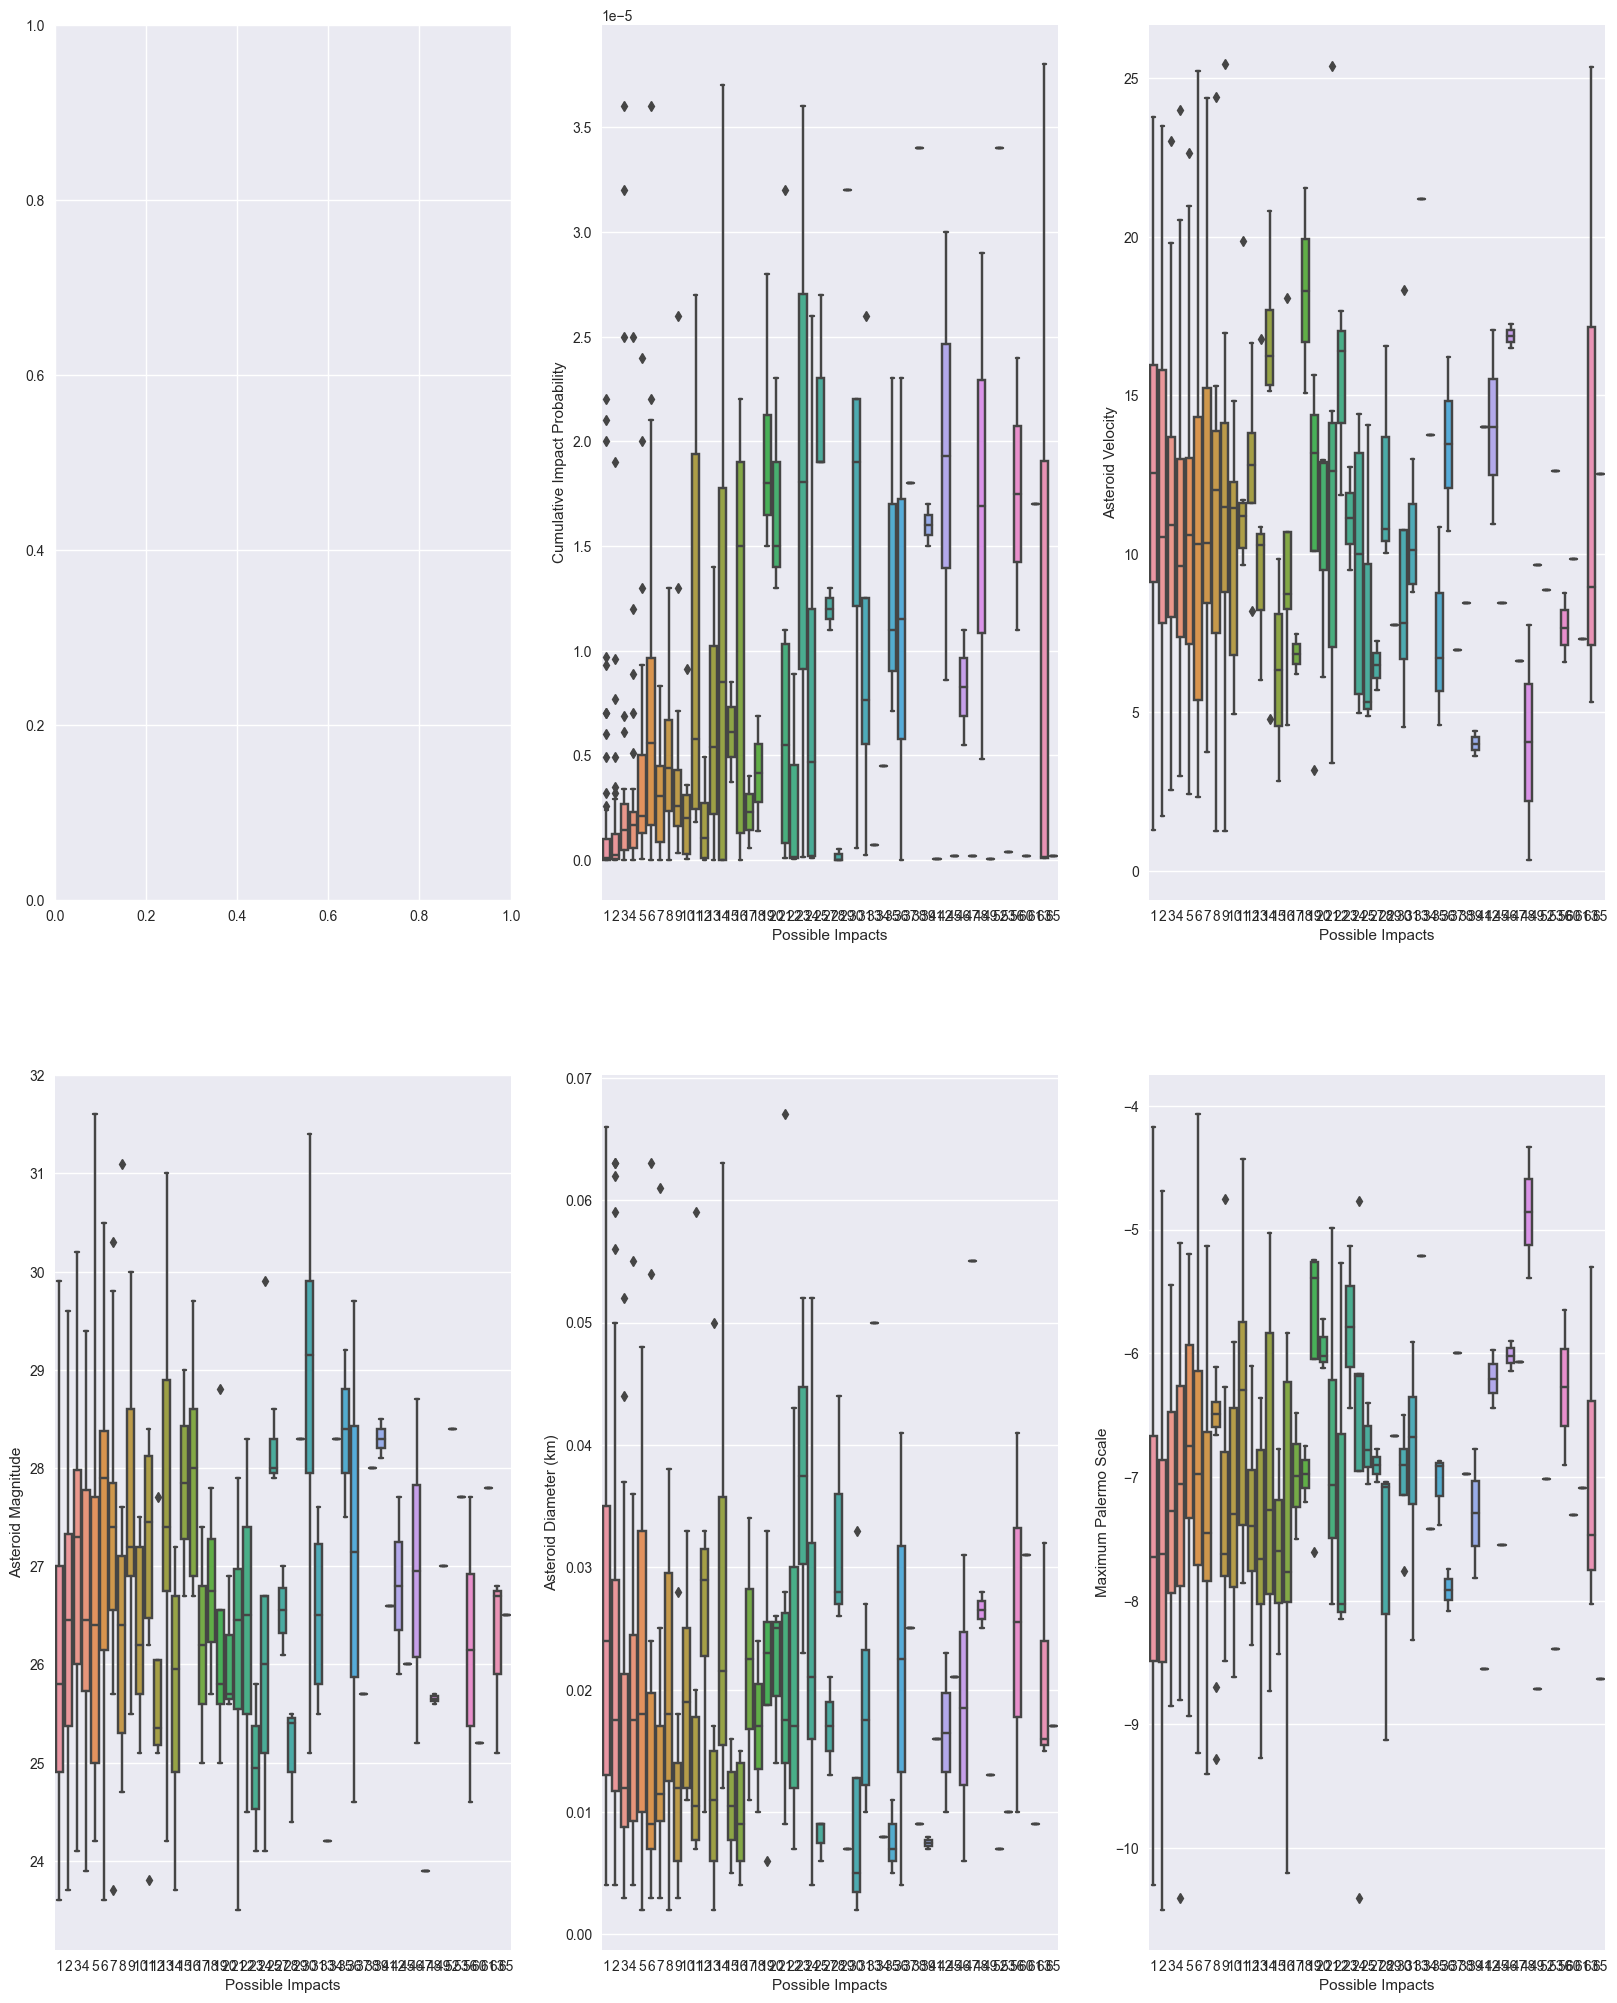

In [15]:
# Show boxplot to check for outliers
boxplot_data(asteroid_impacts_df, asteroid_impacts_features, 0)

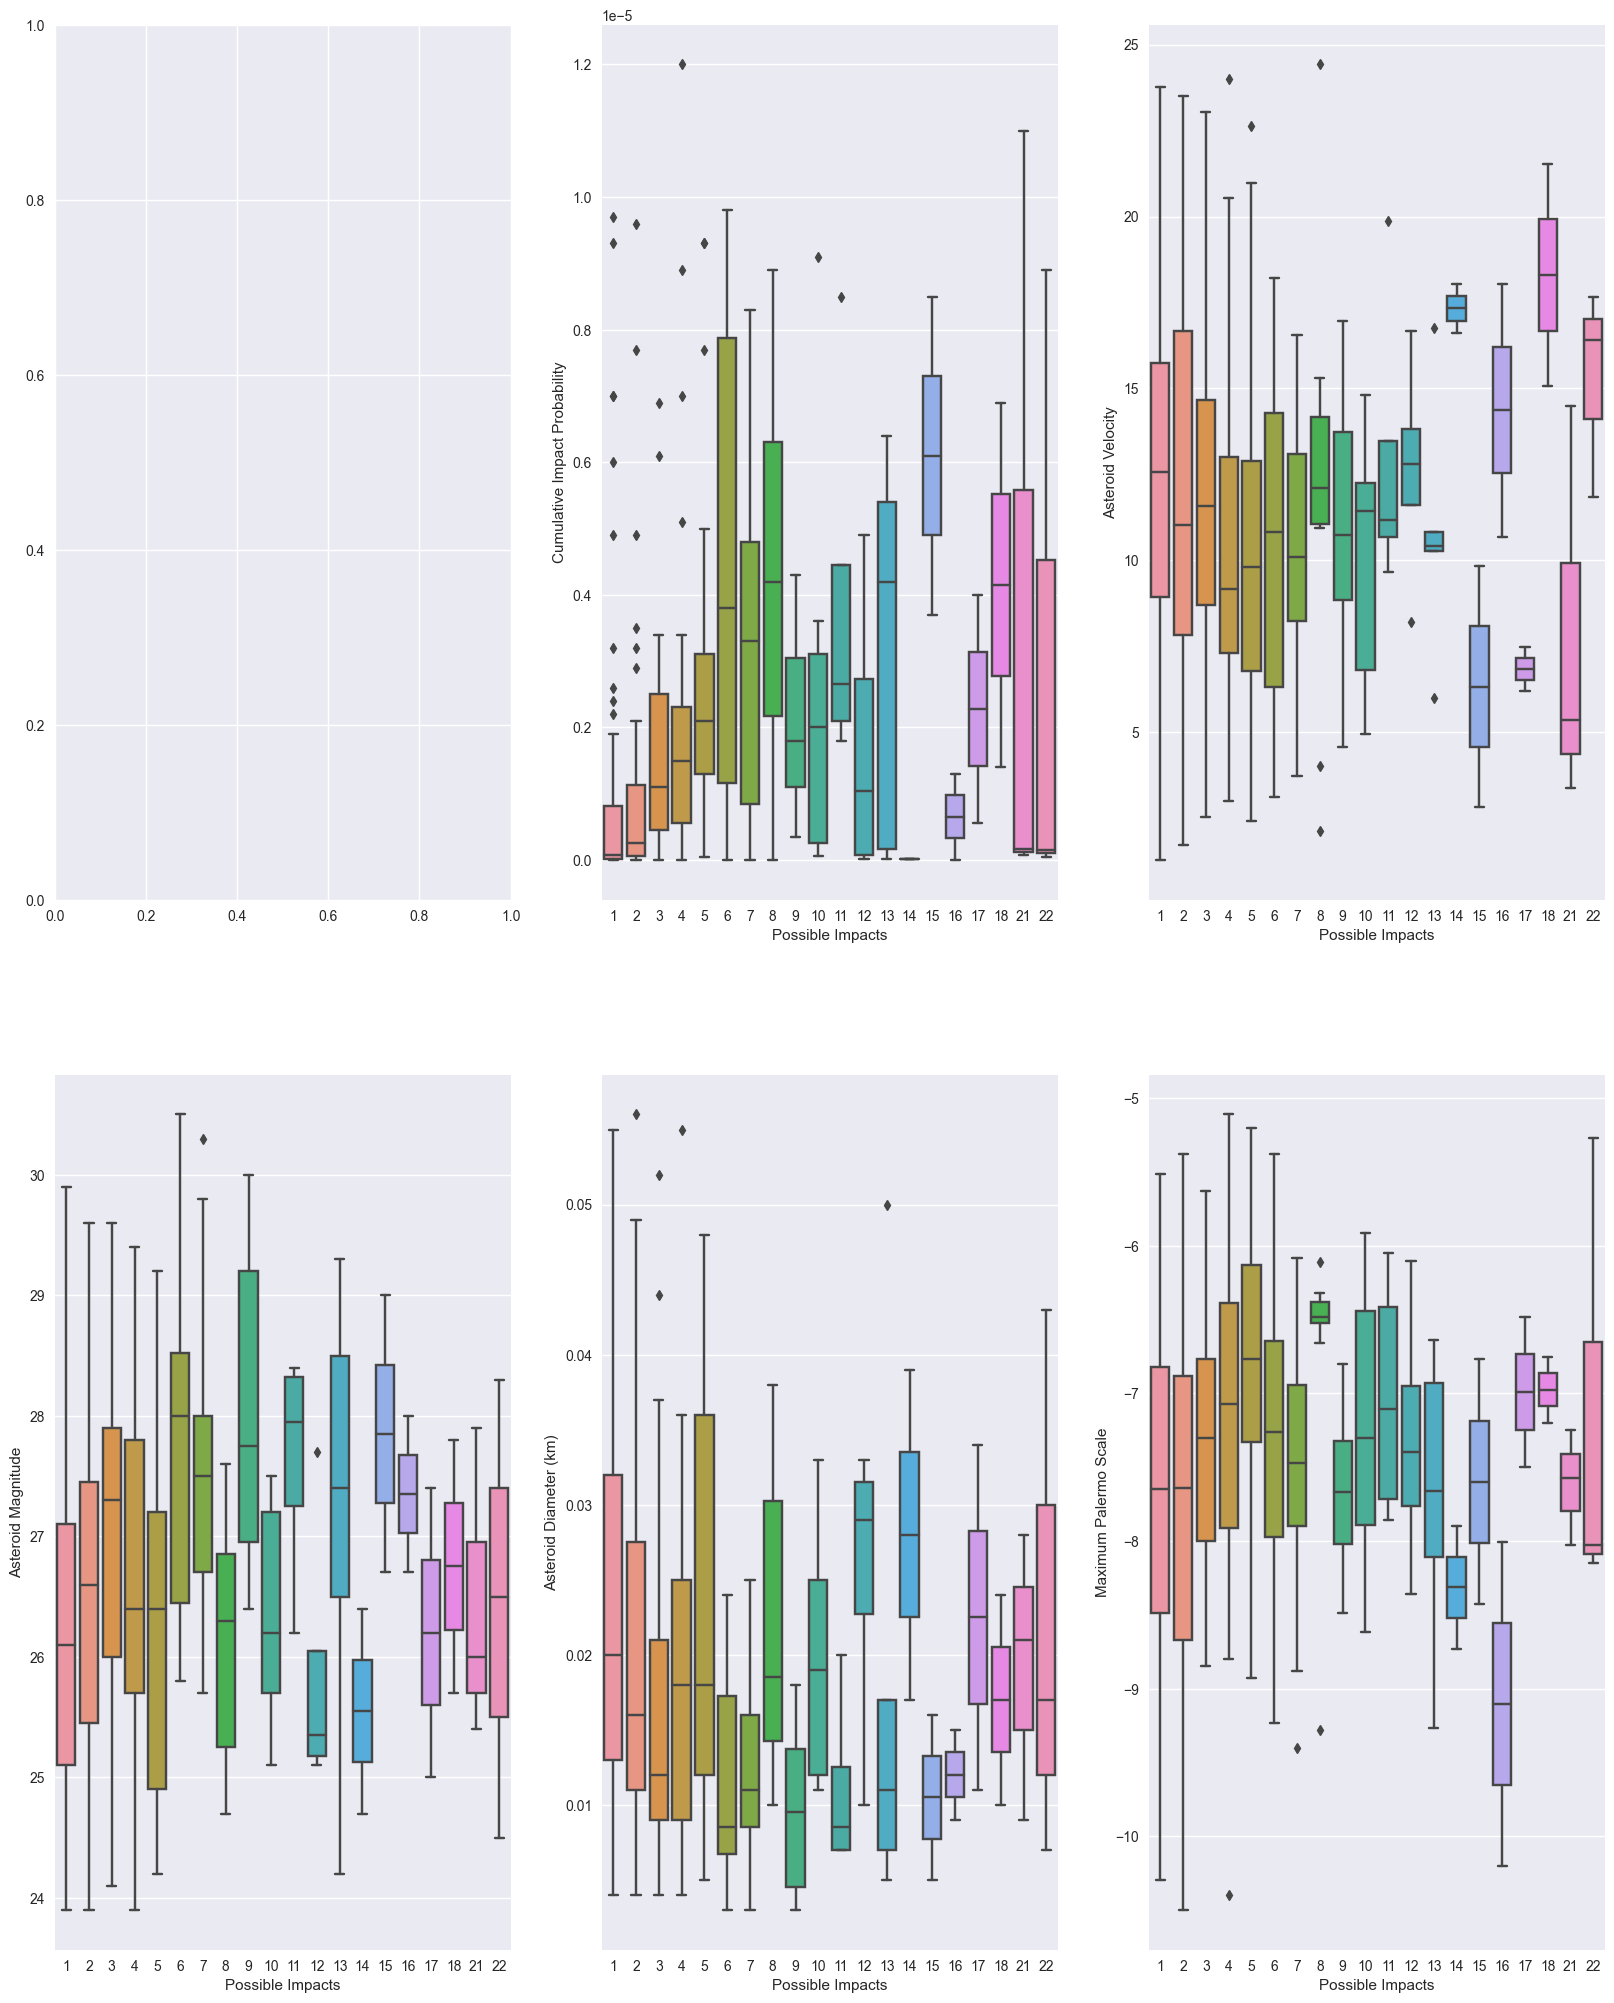

In [16]:
# Remove outliers from the dataframe
asteroid_impacts_df = remove_outliers(asteroid_impacts_df, asteroid_impacts_features)

# Show the boxplot
boxplot_data(asteroid_impacts_df, asteroid_impacts_features, 0)

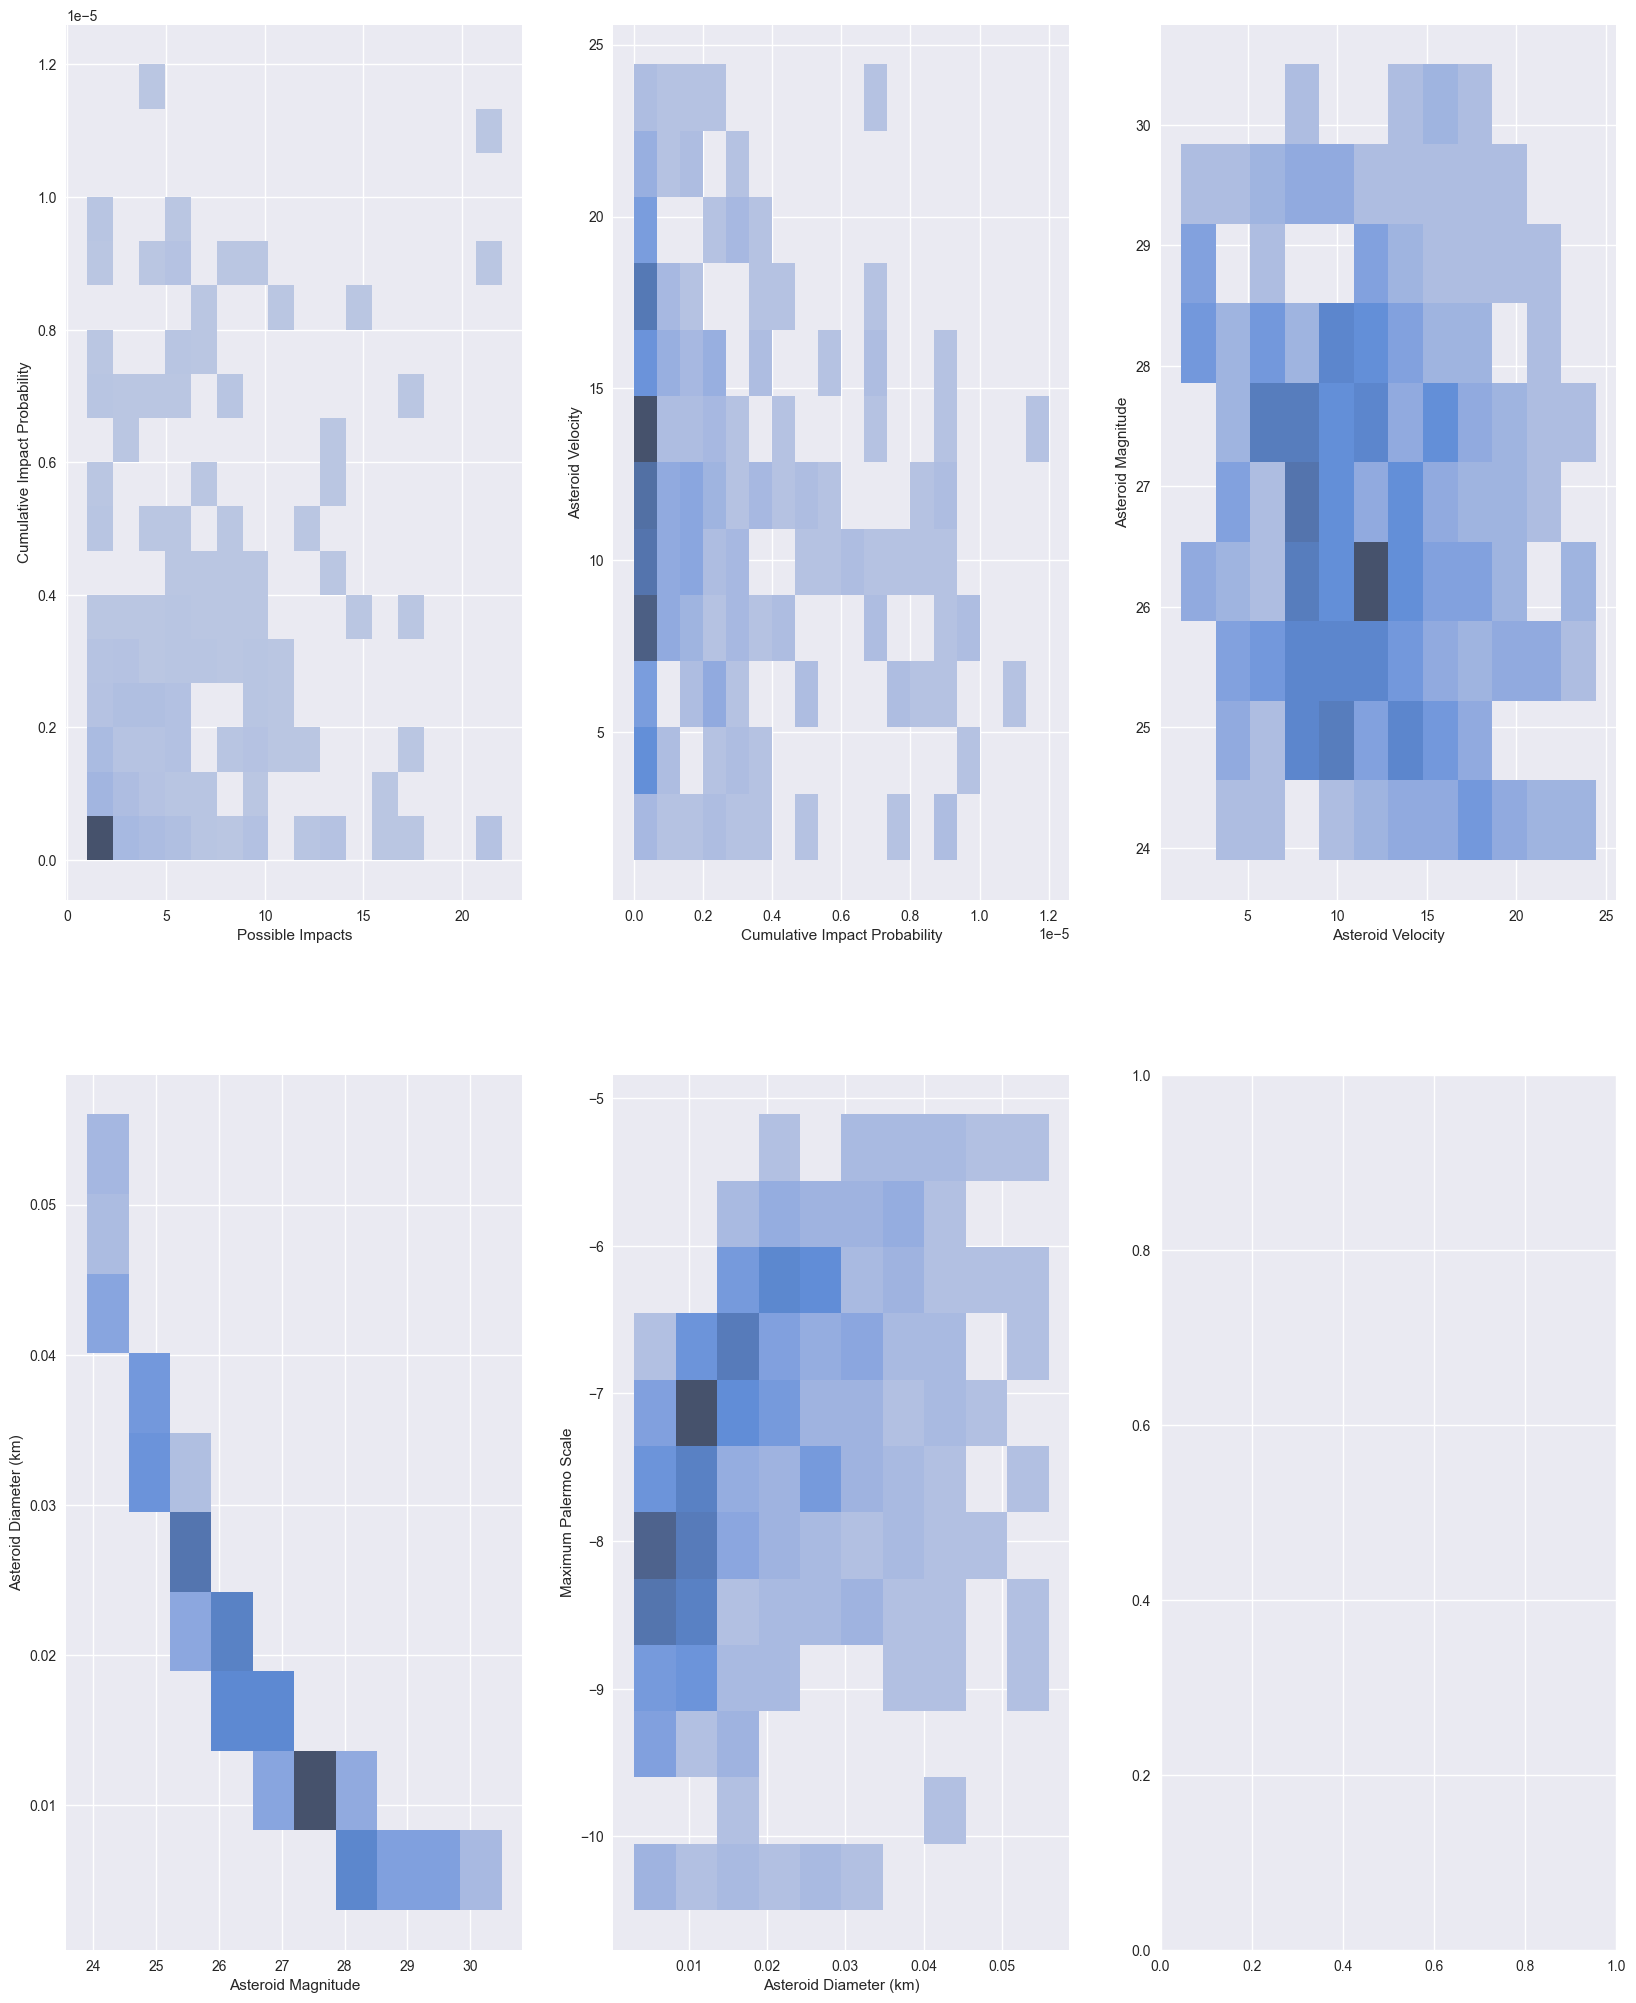

In [17]:
# Show histogram plot for our dataframe
histogram_data(asteroid_impacts_df, asteroid_impacts_features)

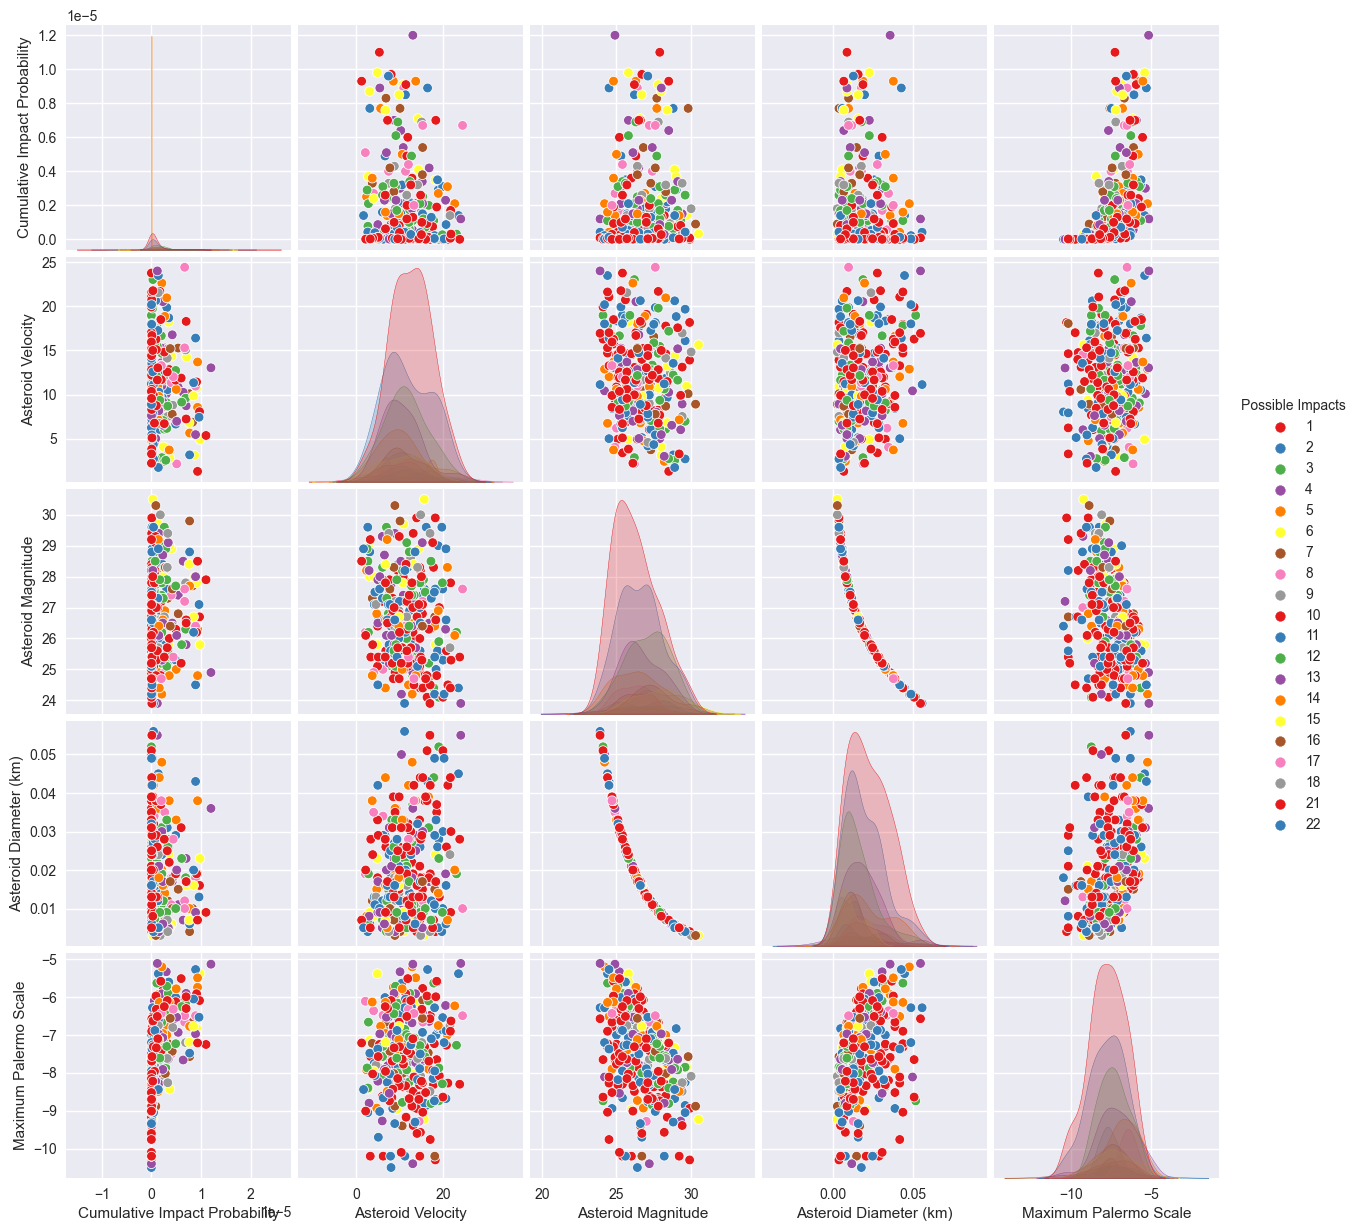

In [18]:
# Show pair plot for our features
sns.pairplot(asteroid_impacts_df, hue=asteroid_impacts_features[0], palette="Set1")

## Normalizing Dataset

In [26]:
# Create normalized dataset
norm_asteroid_impacts_df = asteroid_impacts_df.copy()
# apply normalization techniques
for column in norm_asteroid_impacts_df:
    norm_asteroid_impacts_df[column] = norm_asteroid_impacts_df[column] / norm_asteroid_impacts_df[column].abs().max()

In [27]:
# View normalized Dataset
print(norm_asteroid_impacts_df.head())

    Possible Impacts  Cumulative Impact Probability  Asteroid Velocity  \
0           0.045455                       0.000433           0.727682   
40          1.000000                       0.012500           0.484848   
51          0.045455                       0.000117           0.757166   
52          0.045455                       0.000052           0.666667   
81          0.636364                       0.000750           0.680590   

    Asteroid Magnitude  Asteroid Diameter (km)  Maximum Palermo Scale  
0             0.927869                0.125000              -0.791429  
40            0.927869                0.125000              -0.764762  
51            0.816393                0.625000              -0.728571  
52            0.790164                0.910714              -0.728571  
81            0.809836                0.696429              -0.752381  


## Split Dataset to Train & Test

In [30]:
# Get x & y variables (data & labels)
x = asteroid_impacts_df.drop(["Possible Impacts"], axis=1)
y = asteroid_impacts_df["Possible Impacts"]

In [31]:
# Create train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [32]:
# View splitting result
print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(251, 5) (251,)


## Training Classification Algorithms

### Decision Tree

In [ ]:
model =

### Random Forest

### AdaBoost

### kNN (K Nearest Neighbors)

### SVM (Support Vector Machine)

## Choosing optimal parameter for kNN & SVM

### kNN

### SVM

## Choosing best model

### Classification report

### Confusion matrix

### Best model is